Grafo original com 8 nós:
Arestas do grafo original: [(0, 4), (1, 7), (1, 5), (1, 3), (2, 3), (3, 7), (3, 6), (3, 5), (4, 0), (4, 5), (5, 2), (5, 1), (5, 3), (6, 1), (6, 4), (6, 2), (7, 6)]


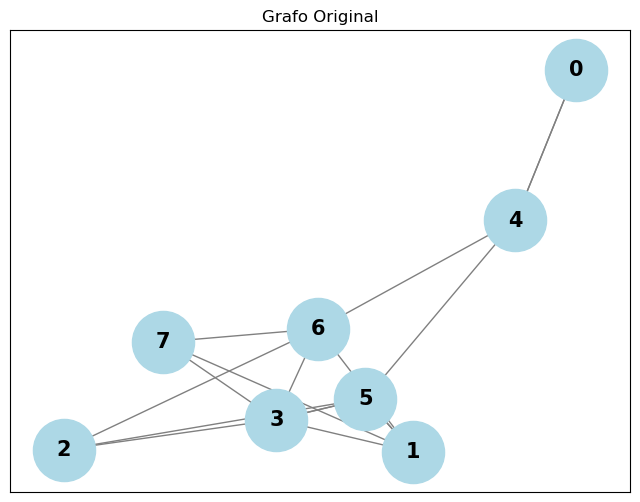

Removendo aresta: (0, 4)
Aresta (0, 4) é crítica e foi recolocada
Removendo aresta: (1, 7)
Aresta (1, 7) é removível
Removendo aresta: (1, 5)
Aresta (1, 5) é removível
Removendo aresta: (1, 3)
Aresta (1, 3) é crítica e foi recolocada
Removendo aresta: (2, 3)
Aresta (2, 3) é crítica e foi recolocada
Removendo aresta: (3, 7)
Aresta (3, 7) é crítica e foi recolocada
Removendo aresta: (3, 6)
Aresta (3, 6) é removível
Removendo aresta: (3, 5)
Aresta (3, 5) é removível
Removendo aresta: (4, 0)
Aresta (4, 0) é crítica e foi recolocada
Removendo aresta: (4, 5)
Aresta (4, 5) é crítica e foi recolocada
Removendo aresta: (5, 2)
Aresta (5, 2) é removível
Removendo aresta: (5, 1)
Aresta (5, 1) é removível
Removendo aresta: (5, 3)
Aresta (5, 3) é crítica e foi recolocada
Removendo aresta: (6, 1)
Aresta (6, 1) é crítica e foi recolocada
Removendo aresta: (6, 4)
Aresta (6, 4) é crítica e foi recolocada
Removendo aresta: (6, 2)
Aresta (6, 2) é crítica e foi recolocada
Removendo aresta: (7, 6)
Aresta (7

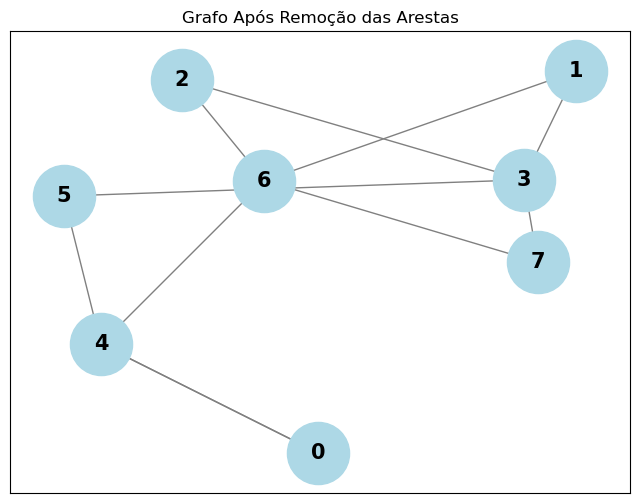

In [9]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generate_strongly_connected_graph(N):
    while True:
        G = nx.DiGraph()
        
        # Adicionar os nós
        G.add_nodes_from(range(N))
        
        # Conectar cada nó com 1 a 3 descendentes
        for node in G.nodes():
            num_descendants = random.randint(1, 3)  # Número aleatório de descendentes
            potential_descendants = [n for n in G.nodes() if n != node and not G.has_edge(node, n)]  # Evitar arestas reversas
            
            descendants = random.sample(potential_descendants, min(num_descendants, len(potential_descendants)))
            
            for descendant in descendants:
                G.add_edge(node, descendant)
        
        # Verificar se o grafo é fortemente conexo
        if nx.is_strongly_connected(G):
            return G

def find_max_removable_edges(G):
    removable_edges = set()
    
    # Verificar cada aresta do grafo
    for edge in list(G.edges()):
        G.remove_edge(*edge)  # Remover temporariamente a aresta
        print(f"Removendo aresta: {edge}")
        
        if nx.is_strongly_connected(G):
            # Se o grafo continuar fortemente conectado, essa aresta é removível
            removable_edges.add(edge)
            print(f"Aresta {edge} é removível")
        else:
            # Se a aresta for crítica para manter o grafo conectado, recolocamos a aresta
            G.add_edge(*edge)
            print(f"Aresta {edge} é crítica e foi recolocada")
    
    return removable_edges

def plot_graph(G, title):
    pos = nx.spring_layout(G)  # Layout para a visualização
    plt.figure(figsize=(8, 6))
    
    # Desenhar os nós
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
    
    # Desenhar as arestas com setas (direcionadas)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowstyle='->', arrowsize=20)
    
    # Desenhar os rótulos dos nós
    nx.draw_networkx_labels(G, pos, font_size=15, font_color='black', font_weight='bold')
    
    plt.title(title)
    plt.show()

# Parte 1: Gerar o grafo
N = random.randint(6    , 10)  # Número aleatório de nós entre 6 e 10
G = generate_strongly_connected_graph(N)

# Imprimir todas as arestas do grafo original
print(f"Grafo original com {N} nós:")
print(f"Arestas do grafo original: {list(G.edges())}")
plot_graph(G, "Grafo Original")

# Parte 2: Encontrar o maior número de arestas removíveis mantendo o grafo ligado
removable_edges = find_max_removable_edges(G)

# Parte 3: Criar um novo grafo sem as arestas removíveis
G_result = G.copy()
G_result.remove_edges_from(removable_edges)

# Plotar os grafos
print(f"Número de arestas removíveis mantendo o grafo ligado: {len(removable_edges)}")
print(f"Arestas removíveis: {removable_edges}")

# Certificar que as arestas removíveis existem no grafo original
for edge in removable_edges:
    if not G.has_edge(*edge):
        print(f"Erro: a aresta {edge} não existe no grafo original!")

print("Grafo resultante após remoção das arestas:")
plot_graph(G_result, "Grafo Após Remoção das Arestas")